# Evaluation of topic models through a user study

This notebook is part of the master thesis at TU Delft. The focus of this research lies on how well topic models cluster opinionated documents on controversial issues given a ground truth, and how human understandable the topic model's output is. This notebook is part of the evaluation of human understandability.

### Platforms
- We used Qualtrics to create the user study
- We used Prolific to distribute the user study

All date has been anonymized prior to any processing

### Content of this notebook
1) Overview of user study structure <br />
2) Loading the data and libraries <br />
3) Visualizations and analysis on the first part of the user study <br />
4) Visualizations and analysis on the second part of the user study <br />
5) Visuazalizations and analysis on the third part of the user study <br />


## 1) Overview of user study structure

Part 1: Metadata <br />
Questions asked: <br />
- What is your age? (1 - 100)
- What is your gender? (Male, Female, Prefer not to say)
- In my opinion abortion should be legal. (5-point likert scale: Strongly disagree, Somewhat disagree, Neutral, Somewhat agree, Strongly disagree)
- I have good knowledge about the abortion debate. (5-point likert scale: idem as above)

Part 2: Main task <br />
Questions asked: <br />
- Use the dropdown to select the viewpoint for a word group

Part 3: User experience <br />
Questions asked: <br />
- A model that can automatically show all viewpoints is useful to quickly understand a debate (5-point likert scale: idem as above)
- I'm now better aware of the possible viewpoints than before (5-point likert scale: idem as above)
- I'm confident that I've correctly assigned the viewpoints to the word groups (5-point likert scale: idem as above)
- If you have any feedback, please let us know

## 2) Loading the data and libraries

In [1]:
import pandas as pd
from ast import literal_eval
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statistics
import matplotlib.pyplot as plt
import matplotlib

correct_vps = ['2 Reproductive choice empowers women by giving them control over their own bodies.', 
               '3 Personhood begins after a fetus becomes “viable” (able to survive outside the womb) or after birth, not at conception.', 
               '7 A baby should not come into the world unwanted.', 
               '9 Abortion is murder because unborn babies are human beings with a right to life.', 
               '11 Abortion is the killing of a human being, which defies the word of God.', 
               '15 If women become pregnant, they should accept the responsibility that comes with producing a child.']
honeypot_list = ['8 Abortion is justified as a means of population control.', 
            '16 Abortion eliminates the potential societal contributions of a future human being.']

def vps_to_numeric(x):
    if '1 The US' in x:
        return 'p7_other'
    if '2 Reproductive' in x:
        return 'p1'
    if '3 Personhood' in x:
        return 'p2'
    if '4 Fetuses' in x:
        return 'p8_other'
    if '5 Women' in x:
        return 'p9_other'
    if '6 Abortion' in x:
        return 'p10_other'
    if '7 A' in x:
        return 'p3'
    if '8 Abortion' in x:
        return 'honeypot1'
    if '9 Abortion' in x:
        return 'p4'
    if '10 Fetuses' in x:
        return 'p11_other'
    if '11 Abortion' in x:
        return 'p5'
    if '12 Abortions' in x:
        return 'p12_other'
    if '13 Selective' in x:
        return 'p13_other'
    if '14 ' in x:
        return 'p14_other'
    if '15 If' in x:
        return 'p6'
    if '16 Abortion' in x:
        return 'honeypot2'

filtered_results_df = pd.read_csv('data/processed_userstudy_results_v1.csv')

## 3) Visualizations and analysis on the first part of the user study

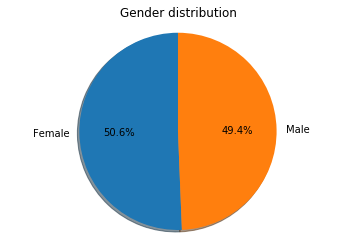

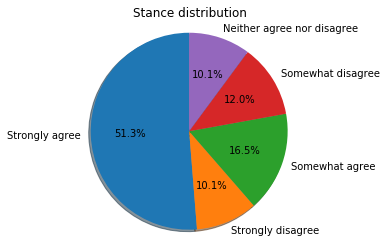

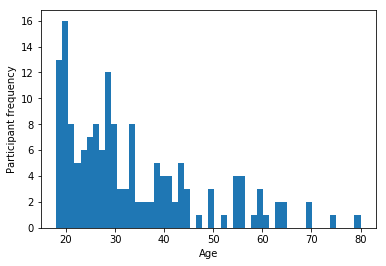

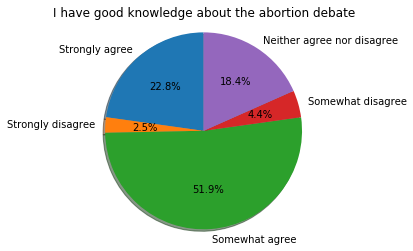

In [2]:
def visualize_piechart(data, title):
    labels = data.keys()
    sizes = data.values()
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels,
            shadow=True, startangle=90, autopct='%1.1f%%')
    ax1.axis('equal')
    plt.title(title)
    plt.show()

# What is your gender? (Male, Female, Prefer not to say)
gender_list = list(filtered_results_df['gender'].dropna())
gender_dictionary = dict((x,gender_list.count(x)) for x in set(gender_list))
gender_dictionary.values()
visualize_piechart(gender_dictionary, 'Gender distribution')

# In my opinion abortion should be legal. (5-point likert scale)
stance_list = list(filtered_results_df['stance'].dropna())
stance_dictionary = dict((x,stance_list.count(x)) for x in set(stance_list))
stance_dictionary.values()
visualize_piechart(stance_dictionary, 'Stance distribution')

# What is your age? (1 - 100)
age_list = list(filtered_results_df['age'])
plt.hist(age_list, bins=50)
plt.xlabel('Age')
plt.ylabel('Participant frequency')

# I have good knowledge about the abortion debate.
knowledge_list = list(filtered_results_df['topic_knowledge'].dropna())
knowledge_dictionary = dict((x,knowledge_list.count(x)) for x in set(knowledge_list))
knowledge_dictionary.values()
visualize_piechart(knowledge_dictionary, 'I have good knowledge about the abortion debate')


## 4) Visualizations and analysis on the second part of the user study
- Distribution of perspectives
- Chosen perspectives per topic, per topic model
- One-way anova

### Distribution of perspectives

On all the data, what viewpoints did users select?
AxesSubplot(0.125,0.125;0.775x0.755)


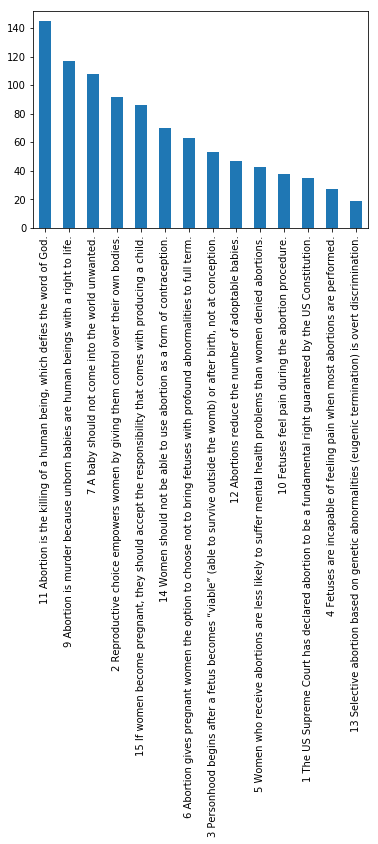

In [9]:
print('On all the data, what viewpoints did users select?')
def vis_distributionvps(data):
    model_answer = pd.DataFrame(columns=['viewpoint'])
    for user in range(0, len(data)):
        model = data.iloc[user]['model']
        for index in range(2, 9):
            if index != 7:
                model_index = model + str(index)
                answer = data.iloc[user][model_index]
                if answer not in honeypot_list:
                    model_answer = model_answer.append({'viewpoint': answer}, ignore_index=True)

    print(model_answer['viewpoint'].value_counts().plot(kind='bar')) #.apply(vps_to_numeric).value_counts().plot(kind='bar'))

vis_distributionvps(filtered_results_df)

16


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "best left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


<Figure size 7200x1872 with 0 Axes>

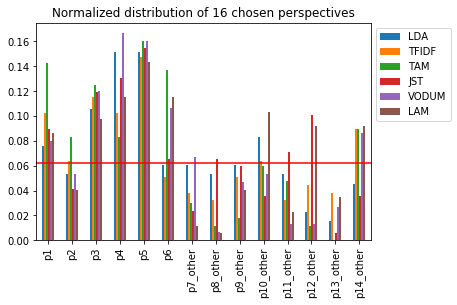

In [4]:
perspectives = [
    '1 The US Supreme Court has declared abortion to be a fundamental right guaranteed by the US Constitution.',
    '2 Reproductive choice empowers women by giving them control over their own bodies.',
    '3 Personhood begins after a fetus becomes “viable” (able to survive outside the womb) or after birth, not at conception.',
    '4 Fetuses are incapable of feeling pain when most abortions are performed.',
    '5 Women who receive abortions are less likely to suffer mental health problems than women denied abortions.',
    '6 Abortion gives pregnant women the option to choose not to bring fetuses with profound abnormalities to full term.',
    '7 A baby should not come into the world unwanted.',
    '8 Abortion is justified as means of population control.',
    '9 Abortion is murder because unborn babies are human beings with a right to life.',
    '10 Fetuses feel pain during the abortion procedure.',
    '11 Abortion is the killing of a human being, which defies the word of God.',
    '12 Abortions reduce the number of adoptable babies.',
    '13 Selective abortion based on genetic abnormalities (eugenic termination) is overt discrimination.',
    '14 Women should not be able to use abortion as a form of contraception.',
    '15 If women become pregnant, they should accept the responsibility that comes with producing a child.',
     '16 Abortion eliminates the potential societal contributions of a future human being.',           
    ]

perspectives_all = [
     'p1', 'p2', 'p3', 'p4', 'p5', 'p6','p7_other', 'p8_other', 'p9_other', 'p10_other',  'p11_other',  
    'p12_other', 'p13_other', 'p14_other', 
]


# 2 3 7 9 11 15 are the six correct perspectives
# all, but sorted on the perspective index
model_data = {
    'LDA': [0.075758, 0.053030, 0.106061, 0.151515, 0.151515, 0.060606, 0.060606, 0.053030, 
            0.060606, 0.083333, 0.053030, 0.022727, 0.015152, 0.045455],
    'TFIDF': [0.102564, 0.064103, 0.115385, 0.102564, 0.147436, 0.051282, 0.038462, 0.032051, 
              0.051282, 0.064103, 0.032051, 0.044872, 0.038462, 0.089744],
    'TAM': [0.142857, 0.083333, 0.125000, 0.083333, 0.160714,  0.136905, 0.029762, 0.011905, 0.017857, 
            0.059524, 0.047619, 0.011905, 0, 0.089286],
    'JST': [0.089286, 0.041667, 0.119048, 0.130952, 0.154762, 0.065476, 0.023810, 0.065476, 0.059524, 
            0.035714, 0.071429, 0.101190, 0.005952, 0.035714],
    'VODUM': [0.080000, 0.053333, 0.120000, 0.166667, 0.160000, 0.106667, 0.066667, 0.006667, 0.046667,
              0.053333, 0.013333, 0.013333, 0.026667, 0.086667],
    'LAM': [0.086207, 0.040230, 0.097701, 0.114943, 0.143678, 0.114943, 0.011494, 0.005747, 0.040230,
            0.103448, 0.022989,0.091954, 0.034483, 0.091954],
}

# 0.0625 = 1/V

def vps_per_model(model, data):
    model_answer = pd.DataFrame(columns=['viewpoint', 'vp_number'])
    model_subset = data.loc[data['model'] == model]
    for user in range(0, len(model_subset)):
        for index in range(2, 9):
            if index != 7:
                model_index = model + str(index)
                answer = model_subset.iloc[user][model_index]
                model_answer = model_answer.append({'viewpoint': answer, 'vp_number': answer.split(' ')[0]}, ignore_index=True)

print(len(perspectives))
matplotlib.pyplot.figure(figsize=(100, 26))
plot_df = pd.DataFrame(data=model_data, index=perspectives_all)
plot_df.plot.bar(rot=90, title="Normalized distribution of 16 chosen perspectives")
matplotlib.pyplot.axhline(y=0.0625, color='r', linestyle='-')
matplotlib.pyplot.legend(bbox_to_anchor=(1, 1), loc='best left', ncol=1)
matplotlib.pyplot.show()

### Chosen perspectives per topic, per topic model

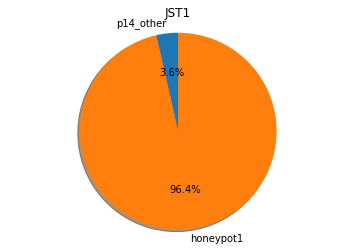

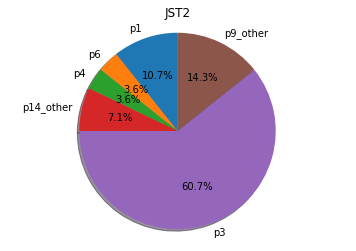

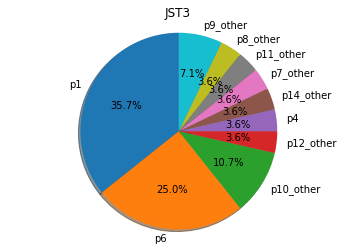

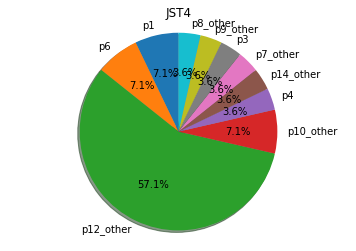

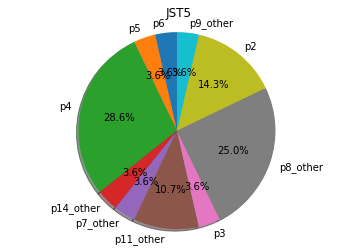

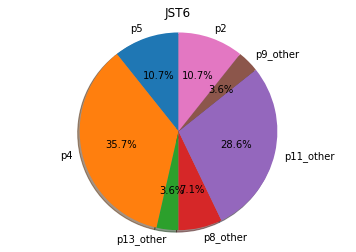

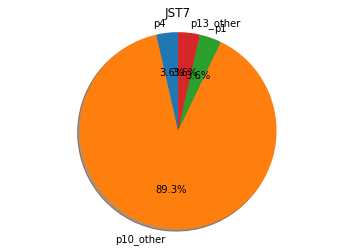

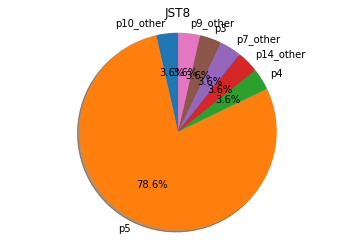

In [5]:
def vis_viewpoint_distribution(model, data):
    for i in range(1, 9):
        model_string = model + str(i)
        model_list = list(data[model_string].loc[data['model'] == model].apply(vps_to_numeric))
        
        model_dictionary = dict((x,model_list.count(x)) for x in set(model_list))
        model_dictionary.values()
        visualize_piechart(model_dictionary, model_string)

vis_viewpoint_distribution('JST', filtered_results_df) # Change the model name to your liking

### One-way ANOVA

In [6]:
# FUNCTIONS

# How many correct perspectives found per topic model?
def count_correct(data, model, annotations):
    user_data = pd.DataFrame(columns=['correct'])
    for user in range(0, len(data)):
        model_answer = []
        for index in range(2, 9):
            if index != 7:
                model_index = model + str(index)
                answer = data.iloc[user][model_index]
                if answer in annotations:
                    model_answer.append(answer)
        model_count = len(set(model_answer))
        user_data = user_data.append({'correct': model_count}, ignore_index=True)
    user_data.reset_index(drop=True)
    return user_data

# How many different perspectives chosen per topic per topic model?
def count_perspectives(data, model):
    user_data = pd.DataFrame(columns=['perspectives_n'])
    for index in range(2, 9):
        if index != 7:
            model_index = model + str(index)
            cluster_subset = data[model_index]
            model_count = len(set(cluster_subset))
            user_data = user_data.append({'perspectives_n': model_count}, ignore_index=True)
    user_data.reset_index(drop=True)
    return user_data

# For count_correct()
def prepare_anovav1(filtered_results_df, correct_vpslist):
    tfidf_users = filtered_results_df.loc[filtered_results_df['model'] == 'TFIDF']
    lda_users = filtered_results_df.loc[filtered_results_df['model'] == 'LDA']
    vodum_users = filtered_results_df.loc[filtered_results_df['model'] == 'VODUM']
    lam_users = filtered_results_df.loc[filtered_results_df['model'] == 'LAM']
    tam_users = filtered_results_df.loc[filtered_results_df['model'] == 'TAM']
    jst_users = filtered_results_df.loc[filtered_results_df['model'] == 'JST']

    # ANOVA
    total_score_list = list(count_correct(tfidf_users, 'TFIDF', correct_vpslist)['correct']) + list(count_correct(lda_users, 'LDA', correct_vpslist)['correct']) + list(count_correct(jst_users, 'JST', correct_vpslist)['correct']) + list(count_correct(vodum_users, 'VODUM', correct_vpslist)['correct']) + list(count_correct(tam_users, 'TAM', correct_vpslist)['correct']) + list(count_correct(lam_users, 'LAM', correct_vpslist)['correct'])
    total_model_list = (['tfidf'] * len(tfidf_users) + ['lda'] * len(lda_users) +  ['jst'] * len(jst_users) + ['vodum'] *  len(vodum_users) + ['tam'] * len(tam_users) + ['lam'] * len(lam_users))
    return calculate_anova(total_model_list, total_score_list)

# For count_perspectives()
def prepare_anovav2(filtered_results_df):
    clusters_n = 6
    tfidf_users = filtered_results_df.loc[filtered_results_df['model'] == 'TFIDF']
    lda_users = filtered_results_df.loc[filtered_results_df['model'] == 'LDA']
    vodum_users = filtered_results_df.loc[filtered_results_df['model'] == 'VODUM']
    lam_users = filtered_results_df.loc[filtered_results_df['model'] == 'LAM']
    tam_users = filtered_results_df.loc[filtered_results_df['model'] == 'TAM']
    jst_users = filtered_results_df.loc[filtered_results_df['model'] == 'JST']

    # ANOVA
    total_score_list = list(count_perspectives(tfidf_users, 'TFIDF')['perspectives_n']) + list(count_perspectives(lda_users, 'LDA')['perspectives_n']) + list(count_perspectives(jst_users, 'JST')['perspectives_n']) + list(count_perspectives(vodum_users, 'VODUM')['perspectives_n']) + list(count_perspectives(tam_users, 'TAM')['perspectives_n']) + list(count_perspectives(lam_users, 'LAM')['perspectives_n'])
    total_model_list = (['tfidf'] * clusters_n + ['lda'] * clusters_n +  ['jst'] * clusters_n + ['vodum'] *  clusters_n + ['tam'] * clusters_n + ['lam'] * clusters_n)
    return calculate_anova(total_model_list, total_score_list)

def calculate_anova(model_list, score_list): 
    anova_data_df = pd.DataFrame({'model': model_list, 'score': score_list})
    print(anova_data_df.groupby('model').mean())

    anova_lm = ols('score ~ model', data=anova_data_df).fit()
    anova_table = sm.stats.anova_lm(anova_lm)
    print(anova_table)

    m_comp = pairwise_tukeyhsd(endog=anova_data_df['score'], groups=anova_data_df['model'], alpha=0.05) # post-hoc comparison
    print(m_comp)
    
    return model_list, score_list

In [7]:
correct_perspectives_model_list, correct_perspectives_score_list = prepare_anovav1(filtered_results_df, correct_vps)

total_perspectives_model_list, total_perspectives_score_list = prepare_anovav2(filtered_results_df)

          score
model          
jst    3.607143
lam    3.586207
lda    3.590909
tam    4.392857
tfidf  3.500000
vodum  4.120000
             df      sum_sq   mean_sq         F    PR(>F)
model       5.0   18.067914  3.613583  4.399403  0.000906
Residual  152.0  124.849807  0.821380       NaN       NaN
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 jst    lam   -0.0209   -0.714  0.6722 False 
 jst    lda   -0.0162  -0.7615  0.7291 False 
 jst    tam    0.7857   0.0866  1.4849  True 
 jst   tfidf  -0.1071  -0.8196  0.6053 False 
 jst   vodum   0.5129   -0.207  1.2327 False 
 lam    lda    0.0047  -0.7349  0.7443 False 
 lam    tam    0.8067   0.1136  1.4997  True 
 lam   tfidf  -0.0862  -0.7927  0.6203 False 
 lam   vodum   0.5338  -0.1801  1.2477 False 
 lda    tam    0.8019   0.0567  1.5472  True 
 lda   tfidf  -0.0909  -0.8487  0.6669 False 
 lda   vodum   0.5291  -0.2356  1.2938 False 
 ta

In [ ]:
# Process data for JASP
anova_results = pd.DataFrame()
anova_results['model'] = model_list
anova_results['score'] = score_list
anova_results.to_csv('userstudy/anovaresults.csv', index=False)

anova_results1 = pd.DataFrame()
anova_results1['model'] = total_perspectives_model_list
anova_results1['score'] = total_perspectives_score_list
anova_results1.to_csv('userstudy/anova_perspectivespertopic.csv', index=False)

### Correlation between stance and perspectives

In [8]:
def stance_to_numeric(stance):
    if stance == 'Strongly disagree':
        answer = 1
    elif stance == 'Somewhat disagree':
        answer = 2
    elif stance == 'Neither agree nor disagree':
        answer = 3
    elif stance == 'Somewhat agree':
        answer = 4
    else: # 'Strongly agree'
        answer = 5
    return answer

def perspectives_per_stance(data):
    model_list = ['LDA', 'TFIDF', 'TAM', 'JST', 'VODUM', 'LAM']
    correct_vp = ['2', '3', '7', '9', '11', '15']
    model_answer = pd.DataFrame(columns=['stance', 'pro_n', 'con_n', 'total_n', 'model'])
    for user in range(0, len(data)):
        con_answer = 0
        pro_answer = 0
        model = data.iloc[user]['model']
        stance = data.iloc[user]['stance']
        for index in range(2, 9):
            if index != 7:
                model_index = model + str(index)
                answer = data.iloc[user][model_index].split(' ')[0]
                if answer not in correct_vp:
                    if int(answer) > 8:
                        con_answer = con_answer + 1
                    else:
                        pro_answer = pro_answer + 1
        model_answer = model_answer.append({'stance': stance_to_numeric(stance), 'pro_n': pro_answer,
                                           'con_n': con_answer, 'total_n': pro_answer + con_answer, 'model': model}, ignore_index=True)
    print('Stance vs pro-perspectives')
    print('Spearman: ', model_answer['stance'].corr(model_answer['pro_n'], method='spearman'))
    print('Pearson: ', model_answer['stance'].astype(float).corr(model_answer['pro_n'].astype(float), method='pearson'))
    
    print('Stance vs con-perspectives')
    print('Spearman: ', model_answer['stance'].corr(model_answer['con_n'], method='spearman'))
    print('Pearson: ', model_answer['stance'].astype(float).corr(model_answer['con_n'].astype(float), method='pearson'))
    
    print('Stance vs total perspectives')
    print('Spearman: ', model_answer['stance'].corr(model_answer['total_n'], method='spearman'))
    print('Pearson: ', model_answer['stance'].astype(float).corr(model_answer['total_n'].astype(float), method='pearson'))
    return model_answer

print('Are people more open-minded based on stance?')
perspectives_data_df = perspectives_per_stance(filtered_results_df)

Are people more open-minded based on stance?
Stance vs pro-perspectives
Spearman:  -0.05784606091104855
Pearson:  -0.0665513402034138
Stance vs con-perspectives
Spearman:  0.12550750383809428
Pearson:  0.1481430886959477
Stance vs total perspectives
Spearman:  0.057826698246885085
Pearson:  0.07607108350066027


## 5) Visualizations and analysis on the third part of the user study

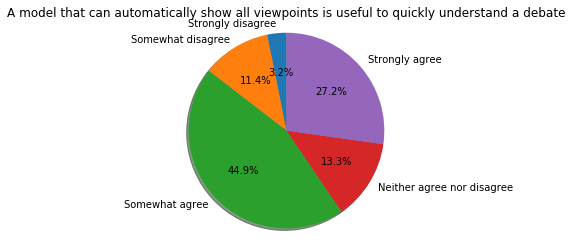

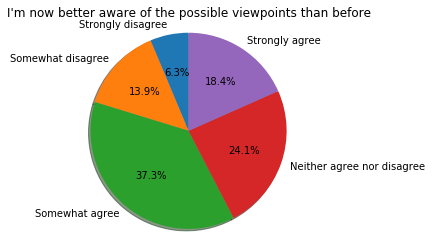

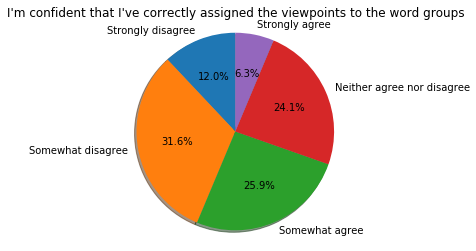

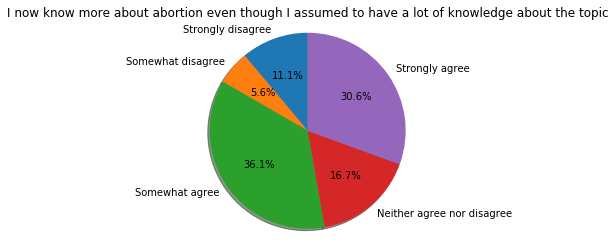

,model,feedback
7,LDA,this study made absolutely no sense.
8,VODUM,"Bad English grammar, makes it hard to understand some things. Also, some of the option presented do not match any statement correctly, thus forcing the participant to selecte randomly."
10,JST,"not all the options seem covered, i.e. the answers were prescriptive"
13,JST,This Survey is somewhat confusing
22,TAM,If this is used for good then this modal can be used to assist governments in making decisions based on a majority within the population. This could be good if used impartially.
24,TAM,I know one was definitely wrong but I couldn't work it out
27,TAM,some double negatives were difficult to understand
29,TAM,"none, great survey:)"
48,TFIDF,So confused!!
52,LDA,none


In [10]:
# A model that can automatically show all viewpoints is useful to quickly understand a debate (5-point likert scale)
usefulness_list = list(filtered_results_df['Q17_1'].dropna())
usefulness_dictionary = dict((x,usefulness_list.count(x)) for x in set(usefulness_list))
usefulness_dictionary.values()
visualize_piechart(usefulness_dictionary, 'A model that can automatically show all viewpoints is useful to quickly understand a debate')

# I'm now better aware of the possible viewpoints than before (5-point likert scale)
knowmorevps_list = list(filtered_results_df['Q17_2'].dropna())
knowmorevps_dictionary = dict((x,knowmorevps_list.count(x)) for x in set(knowmorevps_list))
knowmorevps_dictionary.values()
visualize_piechart(knowmorevps_dictionary, "I'm now better aware of the possible viewpoints than before")

# - I'm confident that I've correctly assigned the viewpoints to the word groups (5-point likert scale)
answerconfidence_list = list(filtered_results_df['Q17_3'].dropna())
answerconfidence_dictionary = dict((x,answerconfidence_list.count(x)) for x in set(answerconfidence_list))
answerconfidence_dictionary.values()
visualize_piechart(answerconfidence_dictionary, "I'm confident that I've correctly assigned the viewpoints to the word groups")

# Knowing more viewpoints now than before, even when I said 'strongly agree'
answerknowledge_list = list(filtered_results_df['Q17_2'].loc[filtered_results_df['topic_knowledge'] == 'Strongly agree'].dropna())
answerknowledge_dictionary = dict((x,answerknowledge_list.count(x)) for x in set(answerconfidence_list))
answerknowledge_dictionary.values()
visualize_piechart(answerknowledge_dictionary, 'I now know more about abortion even though I assumed to have a lot of knowledge about the topic')

# If you have any feedback, please let us know
pd.set_option('max_colwidth',300)
filtered_results_df[['model', 'feedback']].loc[filtered_results_df['feedback'].notnull()]


### Analysis of third part of the user study but then sorted on type of model

In [11]:
filtered_results_df['Q17_1numbered'] = 0 
filtered_results_df['Q17_1numbered'].loc[filtered_results_df['Q17_1'] == 'Strongly disagree'] = 1 
filtered_results_df['Q17_1numbered'].loc[filtered_results_df['Q17_1'] == 'Somewhat disagree'] = 2
filtered_results_df['Q17_1numbered'].loc[filtered_results_df['Q17_1'] == 'Neither agree nor disagree'] = 3
filtered_results_df['Q17_1numbered'].loc[filtered_results_df['Q17_1'] == 'Somewhat agree'] = 4
filtered_results_df['Q17_1numbered'].loc[filtered_results_df['Q17_1'] == 'Strongly agree'] = 5

filtered_results_df['Q17_2numbered'] = 0 
filtered_results_df['Q17_2numbered'].loc[filtered_results_df['Q17_2'] == 'Strongly disagree'] = 1 
filtered_results_df['Q17_2numbered'].loc[filtered_results_df['Q17_2'] == 'Somewhat disagree'] = 2
filtered_results_df['Q17_2numbered'].loc[filtered_results_df['Q17_2'] == 'Neither agree nor disagree'] = 3
filtered_results_df['Q17_2numbered'].loc[filtered_results_df['Q17_2'] == 'Somewhat agree'] = 4
filtered_results_df['Q17_2numbered'].loc[filtered_results_df['Q17_2'] == 'Strongly agree'] = 5

filtered_results_df['Q17_3numbered'] = 0 
filtered_results_df['Q17_3numbered'].loc[filtered_results_df['Q17_3'] == 'Strongly disagree'] = 1 
filtered_results_df['Q17_3numbered'].loc[filtered_results_df['Q17_3'] == 'Somewhat disagree'] = 2
filtered_results_df['Q17_3numbered'].loc[filtered_results_df['Q17_3'] == 'Neither agree nor disagree'] = 3
filtered_results_df['Q17_3numbered'].loc[filtered_results_df['Q17_3'] == 'Somewhat agree'] = 4
filtered_results_df['Q17_3numbered'].loc[filtered_results_df['Q17_3'] == 'Strongly agree'] = 5

print('\n ------ TAM -------')
print(filtered_results_df[['Q17_1numbered', 'Q17_2numbered', 'Q17_3numbered']].loc[filtered_results_df['model'] == 'TAM'].describe())
print('\n ------ JST -------')
print(filtered_results_df[['Q17_1numbered', 'Q17_2numbered', 'Q17_3numbered']].loc[filtered_results_df['model'] == 'JST'].describe())
print(' \n ------ LAM ------')
print(filtered_results_df[['Q17_1numbered', 'Q17_2numbered', 'Q17_3numbered']].loc[filtered_results_df['model'] == 'LAM'].describe())
print('\n ------ VODUM ------')
print(filtered_results_df[['Q17_1numbered', 'Q17_2numbered', 'Q17_3numbered']].loc[filtered_results_df['model'] == 'VODUM'].describe())
print('\n ------ LDA -------')
print(filtered_results_df[['Q17_1numbered', 'Q17_2numbered', 'Q17_3numbered']].loc[filtered_results_df['model'] == 'LDA'].describe())
print('\n ------ TFIDF ------')
print(filtered_results_df[['Q17_1numbered', 'Q17_2numbered', 'Q17_3numbered']].loc[filtered_results_df['model'] == 'TFIDF'].describe())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)



 ------ TAM -------
       Q17_1numbered  Q17_2numbered  Q17_3numbered
count      28.000000      28.000000      28.000000
mean        3.642857       3.500000       3.178571
std         1.161553       1.105542       1.123934
min         1.000000       1.000000       1.000000
25%         3.000000       3.000000       2.000000
50%         4.000000       4.000000       3.000000
75%         4.000000       4.000000       4.000000
max         5.000000       5.000000       5.000000

 ------ JST -------
       Q17_1numbered  Q17_2numbered  Q17_3numbered
count      28.000000      28.000000      28.000000
mean        4.035714       3.678571       3.250000
std         0.999338       0.944911       1.075829
min         2.000000       2.000000       2.000000
25%         3.750000       3.000000       2.000000
50%         4.000000       4.000000       3.500000
75%         5.000000       4.000000       4.000000
max         5.000000       5.000000       5.000000
 
 ------ LAM ------
       Q17_1numbere